In [3]:
# #import modules
# import os
# import glob
# import pandas as pd
# os.chdir("D:\\CsvToCombine")
# #list all csv files only
# #file_path = "D:\\CsvToCombine"
# #file_list = os.listdir(file_path)
# #file_list
# # csv_files = glob.glob(file_path.format('csv'))
# # csv_files
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# all_filenames

['new_combined_csv.csv',
 'Ped_dir_0_carspeed_2_to_8_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime010120231316.csv',
 'Ped_dir_0_car_speed_12_to_16_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime020120232053.csv',
 'Ped_dir_0_car_speed_16_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime030120230933.csv',
 'Ped_dir_0_car_speed_8_to_12_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime020120231340.csv',
 'Ped_dir_120_car_speed_14_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime050120231148.csv',
 'Ped_dir_120_car_speed_2_to_6_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime030120231903.csv',
 'Ped_dir_120_car_speed_6 to_14_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime040120231109.csv',
 'Ped_dir_240_car_speed_2_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime110120231325.csv']

In [18]:
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "new_combined_csv.csv", index=False, encoding='utf-8-sig')

In [1]:
#importing the dataset
import pandas as pd
filepath = 'D:\\CsvToCombine'
dataset = pd.read_csv(filepath +'\\new_combined_csv.csv')
print(dataset.head)
print(dataset.tail)

<bound method NDFrame.head of         CAR X  CAR Y  PED X  PED Y  NORMALIZED PEDESTRIAN POSITION X  \
0         0.0    0.0    0.0    0.0                               0.0   
1         0.0    0.0    0.0    0.5                               0.5   
2         0.0    0.0    0.0    1.0                               1.0   
3         0.0    0.0    0.0    1.5                               1.5   
4         0.0    0.0    0.0    2.0                               2.0   
...       ...    ...    ...    ...                               ...   
298545    0.0    0.0    5.0    3.0                               3.0   
298546    0.0    0.0    5.0    3.5                               3.5   
298547    0.0    0.0    5.0    4.0                               4.0   
298548    0.0    0.0    5.0    4.5                               4.5   
298549    0.0    0.0    5.0    5.0                               5.0   

        NORMALIZED PEDESTRIAN POSITION Y  NORMALIZED PEDESTRIAN DIRECTION  \
0                           

In [2]:
import numpy as np
#Data cleaning
# 
#removing 1st 4 columns to use only normalized values
dataset.drop(columns=dataset.columns[0:4], axis=1,  inplace=True)
dataset.drop('PEDESTRIAN DIRECTION', axis=1,  inplace=True)
dataset.drop('NORMALIZED CAR DIRECTION', axis=1,  inplace=True)
dataset.drop('PEDESTRIAN SPEED', axis=1,  inplace=True)
dataset.drop('CAR SPEED', axis=1,  inplace=True)
#identify duplicate rows
#duplicateRows = dataset[dataset.duplicated()]
dataset = dataset.drop(dataset.index[dataset['TTC'] < 0])
#view duplicate rows
#duplicateRows
dataset.drop_duplicates(inplace=True)
dataset

#dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.000000e+00,90.000000,0.0,2.0,0.0
1,0.5,3.061617e-17,90.000000,0.0,2.0,0.0
2,1.0,6.123234e-17,90.000000,0.0,2.0,0.0
3,1.5,9.184851e-17,90.000000,0.0,2.0,0.0
4,2.0,1.224647e-16,90.000000,0.0,2.0,0.0
...,...,...,...,...,...,...
99013,3.0,-5.000000e+00,93.141593,5.0,10.0,inf
99014,3.5,-5.000000e+00,93.141593,5.0,10.0,inf
99015,4.0,-5.000000e+00,93.141593,5.0,10.0,inf
99016,4.5,-5.000000e+00,93.141593,5.0,10.0,inf


In [4]:
# duplicateRows = dataset[dataset.duplicated()]

# #view duplicate rows
# duplicateRows
#dataset.drop_duplicates(inplace=True)
#dataset

In [3]:
#Rounding position values to 2 decimal places
dataset['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN DIRECTION'] = np.around(dataset['NORMALIZED PEDESTRIAN DIRECTION'].astype(float), decimals= 2)
dataset['TTC'] = np.around(dataset['TTC'].astype(float), decimals= 2)
dataset.replace([np.inf, -np.inf], -1, inplace=True)
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.0,90.00,0.0,2.0,0.0
1,0.5,0.0,90.00,0.0,2.0,0.0
2,1.0,0.0,90.00,0.0,2.0,0.0
3,1.5,0.0,90.00,0.0,2.0,0.0
4,2.0,0.0,90.00,0.0,2.0,0.0
...,...,...,...,...,...,...
99013,3.0,-5.0,93.14,5.0,10.0,-1.0
99014,3.5,-5.0,93.14,5.0,10.0,-1.0
99015,4.0,-5.0,93.14,5.0,10.0,-1.0
99016,4.5,-5.0,93.14,5.0,10.0,-1.0


In [ ]:
# #Counting the different unique values of TTC
# xx = concatenatedData["TTC"].value_counts().reset_index()
# xx

In [65]:
# # scatter plot of examples by class label
# from collections import Counter
# from sklearn.datasets import make_classification
# from matplotlib import pyplot
# from numpy import where

# counter = Counter('TTC')
# for label, _ in counter.items():
# 	row_ix = where('TTC' == label)[0]
# 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

In [4]:
# xx = dataset["TTC"].value_counts().reset_index()
zz = dataset["TTC"].nunique()
yy = dataset["TTC"].value_counts()
yy

-1.00    64036
 0.00    13576
 0.12      565
 0.06      502
 0.03      496
         ...  
 5.25        1
 5.05        1
 3.02        1
 2.79        1
 0.39        1
Name: TTC, Length: 174, dtype: int64

In [12]:
import smogn
cleaned = smogn.smoter(data=dataset.reset_index(), y = "TTC")

r_index: 100%|##########| 1539/1539 [00:01<00:00, 844.20it/s]


In [13]:
print(cleaned)

       index  NORMALIZED PEDESTRIAN POSITION X  \
0         28                          3.096651   
1         30                          4.249815   
2         28                          3.058323   
3         28                          3.421024   
4         31                          4.616998   
...      ...                               ...   
89240  99006                          5.000000   
89243  99009                          1.000000   
89247  99013                          3.000000   
89249  99015                          4.000000   
89250  99016                          4.500000   

       NORMALIZED PEDESTRIAN POSITION Y  NORMALIZED PEDESTRIAN DIRECTION  \
0                                  -1.0                            90.00   
1                                  -1.0                            90.00   
2                                  -1.0                            90.00   
3                                  -1.0                            90.00   
4                  

In [14]:
ss = cleaned["TTC"].nunique()
tt = cleaned["TTC"].value_counts()
tt

-1.000000    30581
 0.000000     6489
 0.375000     2132
 0.750000      980
 0.276786      897
             ...  
 4.050000        1
 5.090000        1
 2.020000        1
 3.050000        1
 0.850000        1
Name: TTC, Length: 834, dtype: int64

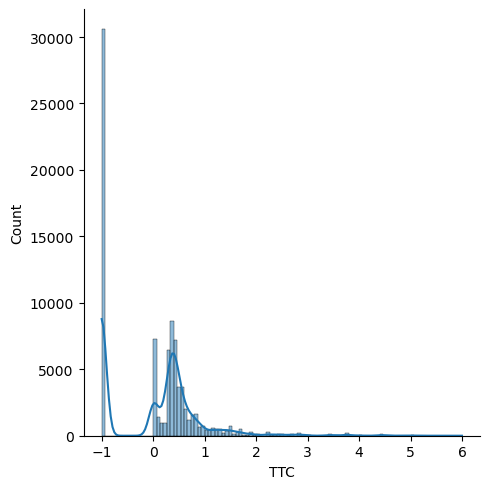

In [17]:
import seaborn as sns
# logData = np.log1p(dataset["TTC"])
# sns.displot(logData, kde = True)
sns.displot(cleaned['TTC'], kde = True)

c:\Users\thiru\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


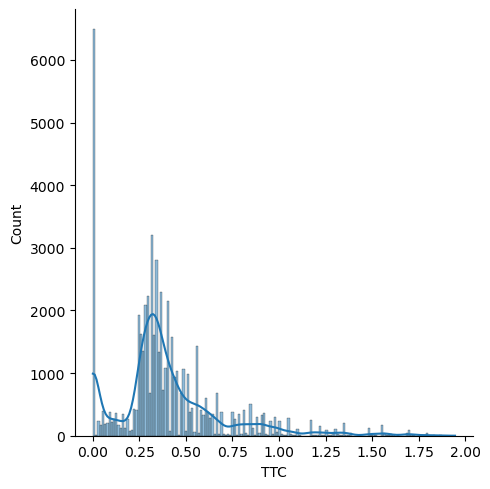

In [16]:
import seaborn as sns
# sns.displot(cleaned['TTC'], kde = True)

logData_cleaned = np.log1p(cleaned["TTC"])
sns.displot(logData_cleaned, kde = True)
#sns.displot(concatenatedData['TTC'], kde = True)
#sns.displot(cleaned['TTC'], kde = True)

In [19]:
# writing cleaned and balanced data to csv
import os
# import glob
# import pandas as pd
os.chdir("D:\\CsvToCombine")
cleaned.to_csv( "cleaned_data_csv.csv", index=False, encoding='utf-8-sig')

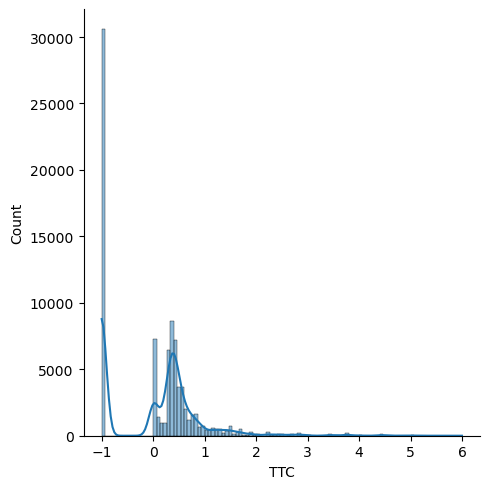

In [6]:
import seaborn as sns
# logData = np.log1p(dataset["TTC"])
# sns.displot(logData, kde = True)
sns.displot(final_dataset['TTC'], kde = True)

In [ ]:
# # writing cleaned and balanced data to csv
# import os
# # import glob
# # import pandas as pd
# os.chdir("D:\\CsvToCombine")
# logData_cleaned.to_csv( "logdata_cleaned_csv.csv", index=False, encoding='utf-8-sig')

In [5]:
import pandas as pd
final_dataset = pd.read_csv('cleaned_data_csv.csv')
final_dataset.drop('index', axis=1,  inplace=True)
final_dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,3.096651,-1.0,90.00,0.0,2.0,0.333333
1,4.249815,-1.0,90.00,0.0,2.0,0.416667
2,3.058323,-1.0,90.00,0.0,2.0,0.375000
3,3.421024,-1.0,90.00,0.0,2.0,0.375000
4,4.616998,-1.0,90.00,0.0,2.0,0.416667
...,...,...,...,...,...,...
85330,5.000000,-4.5,93.14,5.0,10.0,-1.000000
85331,1.000000,-5.0,93.14,5.0,10.0,-1.000000
85332,3.000000,-5.0,93.14,5.0,10.0,-1.000000
85333,4.000000,-5.0,93.14,5.0,10.0,-1.000000


c:\Users\thiru\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        0.287682
1        0.348307
2        0.318454
3        0.318454
4        0.348307
           ...   
85330        -inf
85331        -inf
85332        -inf
85333        -inf
85334        -inf
Name: TTC, Length: 85335, dtype: float64

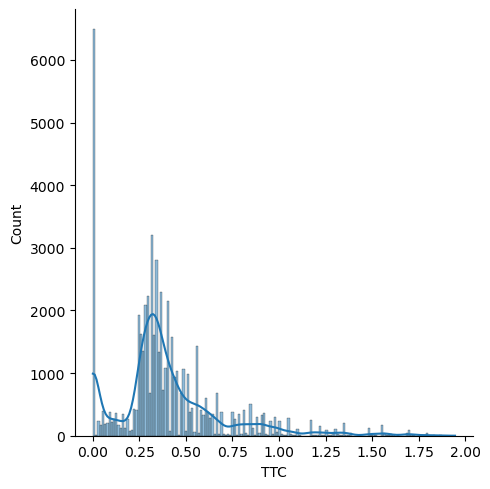

In [219]:
import seaborn as sns
# sns.displot(cleaned['TTC'], kde = True)

logData_cleaned = np.log1p(final_dataset["TTC"])
sns.displot(logData_cleaned, kde = True)
logData_cleaned


In [ ]:
# final_dataset.skew().sort_values(ascending=False)

In [220]:
import tensorflow as tf
#Visualizng how the TTC is distributed
#logData = np.log1p(concatenatedData["TTC"])
#sns.displot(logData, kde = True)
#sns.displot(concatenatedData['TTC'], kde = True)
#sns.displot(cleaned['TTC'], kde = True)
print(tf.__version__)

2.10.0


In [7]:
# Train-Test split

train_dataset = final_dataset.sample(frac = 0.8, random_state=0)
test_dataset = final_dataset.drop(train_dataset.index)

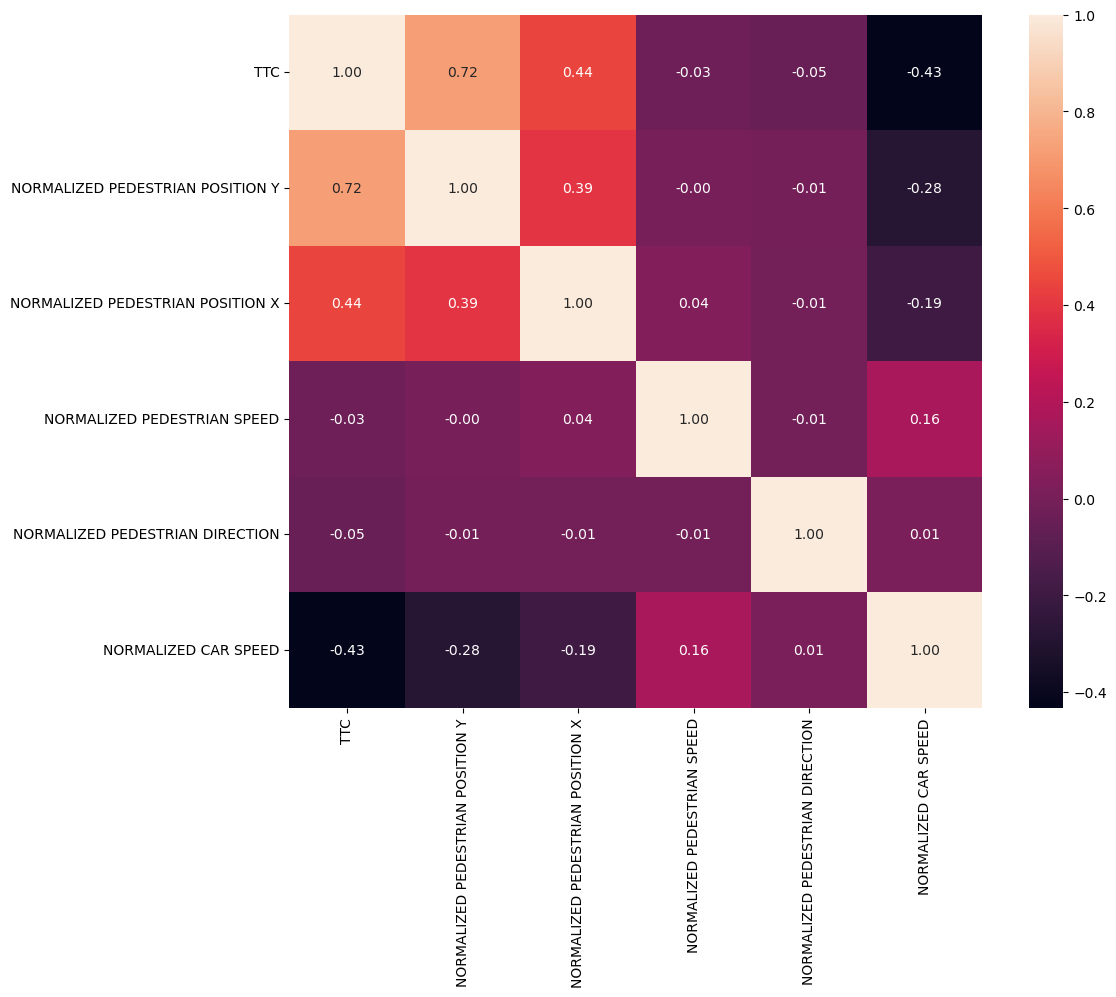

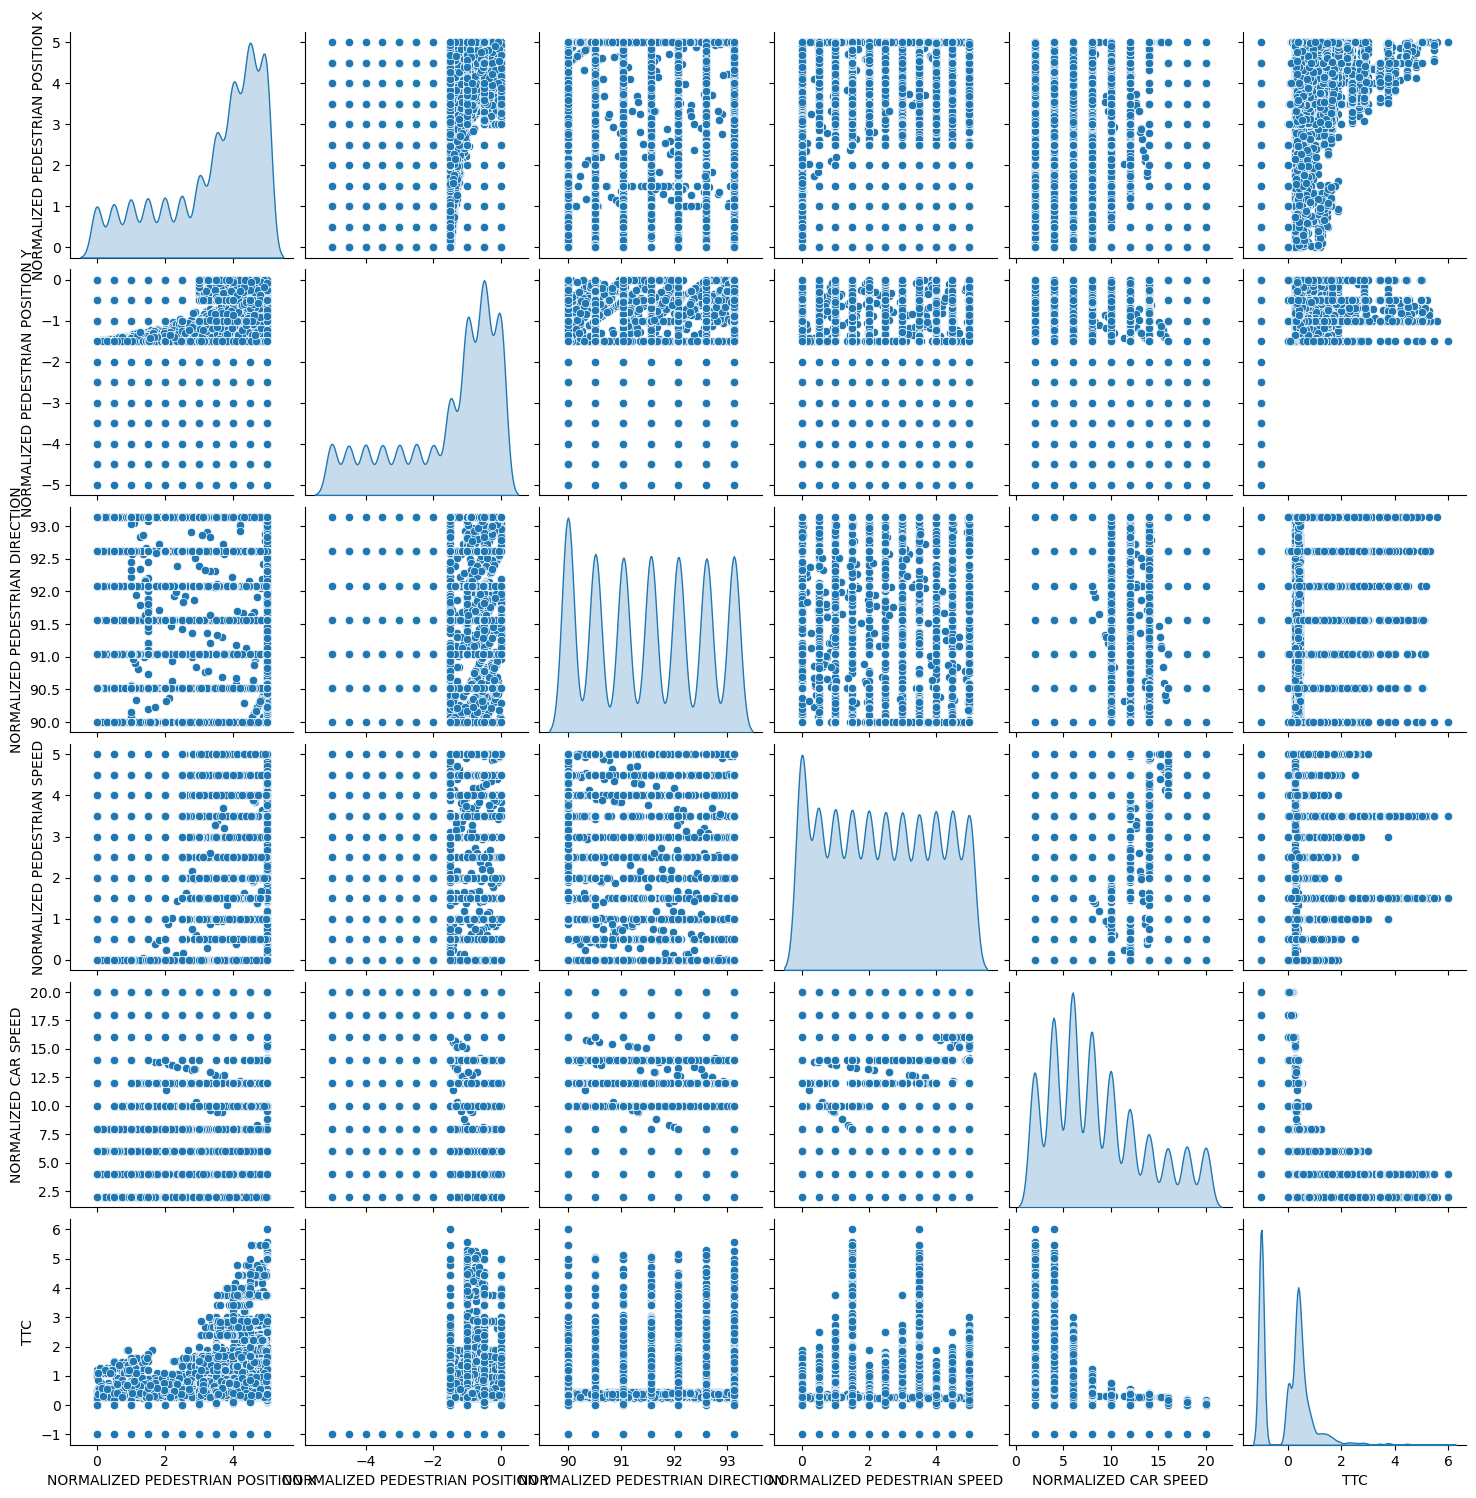

In [8]:
#Correlation matrix and pairplot of the dataset columns

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = train_dataset.corr()
plt.subplots(figsize=(12,9))
k=10
cols = corr_matrix.nlargest(k,'TTC')['TTC'].index
cm = np.corrcoef(train_dataset[cols].values.T)
#sns.heatmap(corr_matrix, vmax=0.9, square=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Plotting the dataset columns to find patterns

sns.pairplot(train_dataset, diag_kind='kde')

In [9]:
#viewing summary such as mean std of the train data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#dataset["TTC"] = np.log1p(dataset["TTC"])
#train_stats = train_dataset.pop('TTC')

train_dataset.describe().transpose()[['mean', 'std']]
# Normalizer = tf.keras.layers.Normalization(axis=-1)
# Normalizer.adapt(np.array(cleaned))
# print(cleaned)

,mean,std
NORMALIZED PEDESTRIAN POSITION X,3.383516,1.475899
NORMALIZED PEDESTRIAN POSITION Y,-1.591244,1.521369
NORMALIZED PEDESTRIAN DIRECTION,91.519794,1.064595
NORMALIZED PEDESTRIAN SPEED,2.407048,1.618683
NORMALIZED CAR SPEED,8.753676,5.100841
TTC,0.001459,0.895526


In [10]:
#Splitting the target variable labels from the data

train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('TTC')
test_labels = test_features.pop('TTC')

In [11]:
#just to check if TTC column has been removed
test_features

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED
2,3.058323,-1.000000,90.00,0.0,2.0
10,3.281570,-0.500000,90.00,0.0,2.0
13,4.584196,-0.500000,90.00,0.0,2.0
20,4.310329,-1.000000,91.05,4.0,10.0
21,4.568131,-0.715934,91.05,4.0,10.0
...,...,...,...,...,...
85299,5.000000,-2.000000,93.14,5.0,10.0
85306,4.500000,-2.500000,93.14,5.0,10.0
85311,0.000000,-3.500000,93.14,5.0,10.0
85313,1.000000,-3.500000,93.14,5.0,10.0


In [ ]:
#Data normalization
#horsepower = np.array(train_features['Horsepower'])


#horsepower_normalizer.adapt(horsepower)

In [33]:
# #Data normalization

# def norm(x):
#     return ((x-train_stats['mean'])/train_stats['std'])
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_features)
X_test = scaler.transform(test_features)

In [15]:
import tensorflow as tf
import keras
from keras import layers

normalizer_layer = keras.layers.Normalization(axis=-1)
#normalizer_layer = layers.Normalization(input_shape=[len(train_features)], axis=None)
normalizer_layer = layers.Normalization(input_shape=[5,], axis=None)
normalizer_layer.adapt(np.array(train_features))
#print('Normalized:', normalizer(train_features).numpy())
# def build_model():
model = keras.Sequential([
        normalizer_layer,
        layers.Dense(units=1)
    ])
model.summary()

    # optimizer = tf.keras.optimizers.RMSprop(0.001)  

    # model.compile(loss='mse',
    #               optimizer=optimizer,
    #               metrics=['mae','mse'])
    # return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 9
Trainable params: 6
Non-trainable params: 3
_________________________________________________________________


In [9]:
model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[-0.02867961],
       [-0.51471996],
       [ 0.02210522],
       [ 0.6441722 ],
       [ 0.68647766]], dtype=float32)>

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [20]:
# Report for training data for linear model
#%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=250,
    batch_size=256,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/250
214/214 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.0763 - val_loss: 0.3576 - val_accuracy: 0.0808
Epoch 2/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0764 - val_loss: 0.3576 - val_accuracy: 0.0807
Epoch 3/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0765 - val_loss: 0.3578 - val_accuracy: 0.0806
Epoch 4/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0764 - val_loss: 0.3576 - val_accuracy: 0.0809
Epoch 5/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0765 - val_loss: 0.3579 - val_accuracy: 0.0809
Epoch 6/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0764 - val_loss: 0.3576 - val_accuracy: 0.0809
Epoch 7/250
214/214 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.0763 - val_loss: 0.3576 - val_accuracy: 0.0808

In [164]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TTC]')
  plt.legend()
  plt.grid(True)

In [22]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


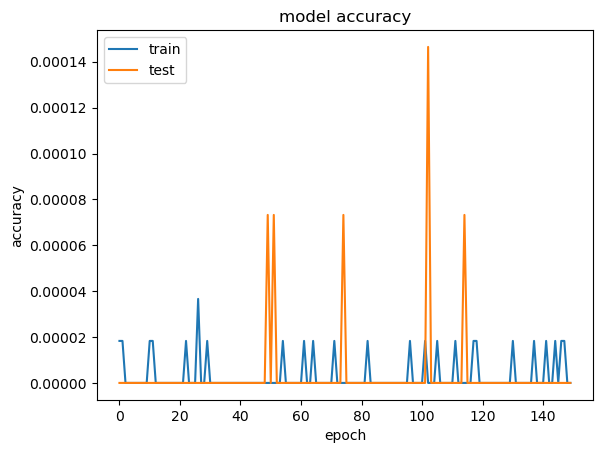

In [165]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

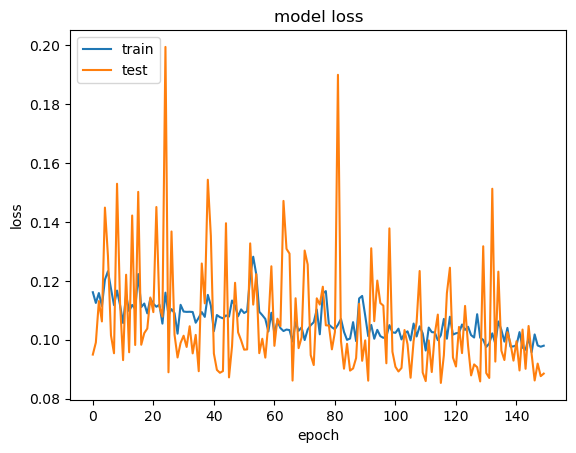

In [166]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [167]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
145,0.095739,0.000000,0.095127,0.0,145
146,0.101805,0.000018,0.086167,0.0,146
147,0.098057,0.000018,0.091907,0.0,147
148,0.097629,0.000000,0.087630,0.0,148
149,0.097982,0.000000,0.088495,0.0,149


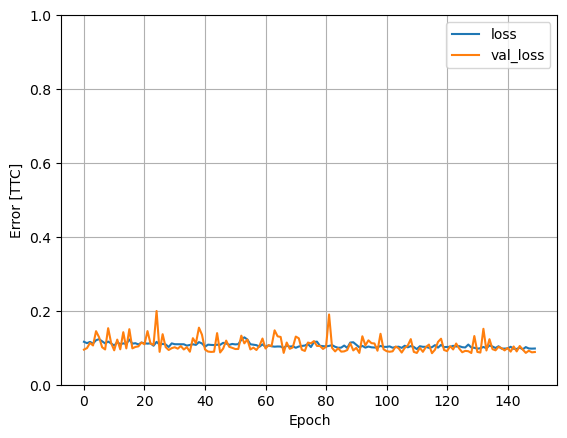

In [168]:
plot_loss(history)

In [169]:
normalized_test_features = np.array(test_features)
normalized_test_labels = np.array(test_labels)
print(normalizer_layer(normalized_test_features).numpy())
print(normalizer_layer(normalized_test_labels).numpy())

[[-0.5015386  -0.6156551   1.9431862  -0.587536   -0.5312977 ]
 [-0.49526104 -0.6015955   1.9431862  -0.587536   -0.5312977 ]
 [-0.45863235 -0.6015955   1.9431862  -0.587536   -0.5312977 ]
 ...
 [-0.587536   -0.6859529   2.0314803  -0.4469403  -0.30634463]
 [-0.55941683 -0.6859529   2.0314803  -0.4469403  -0.30634463]
 [-0.4469403  -0.6859529   2.0314803  -0.4469403  -0.30634463]]
[[-0.57699126 -0.5781629  -0.5758197  ... -0.6156551  -0.6156551
  -0.6156551 ]]


In [ ]:
test_results = {}
normalized_test_features = np.array(test_features)
normalized_test_labels = np.array(test_labels)
test_results['linear_model'] = model.evaluate(
    normalizer_layer(normalized_test_features).numpy(), normalizer_layer(test_labels).numpy().transpose(), verbose=1)

In [29]:
print(test_results['linear_model'])

[2.8383278846740723, 0.0]


In [171]:
print(train_features[:10], normalizer_layer(test_labels).numpy()[:10])
model.predict(train_features[:10])

       NORMALIZED PEDESTRIAN POSITION X  NORMALIZED PEDESTRIAN POSITION Y  \
59460                          3.000000                          0.000000   
4504                           5.000000                         -1.343925   
23504                          4.702201                         -1.500000   
56510                          1.500000                          0.000000   
81815                          4.000000                         -4.500000   
40071                          3.276912                         -1.500000   
31088                          3.824845                         -0.500000   
47856                          4.500000                          0.000000   
82136                          0.000000                         -1.500000   
6043                           5.000000                         -0.788163   

       NORMALIZED PEDESTRIAN DIRECTION  NORMALIZED PEDESTRIAN SPEED  \
59460                        90.520000                          4.0   
4504      

array([[0.38944197],
       [0.4405185 ],
       [0.3165761 ],
       [0.46522623],
       [0.38588008],
       [0.22639686],
       [0.2523683 ],
       [0.2365121 ],
       [0.32280365],
       [0.4435616 ]], dtype=float32)

In [ ]:
#DNN non-linear model #########################################################

In [23]:
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      #normalizer_layer,
      layers.Dense(64,  input_dim=train_features.shape[1], activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  nn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError])
  return nn_model

In [ ]:
dnn_model = build_and_compile_model(normalizer_layer)
dnn_model.summary()

In [207]:
# %%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=50, batch_size=64)

Epoch 1/50
854/854 [==============================] - 3s 3ms/step - loss: 0.3860 - accuracy: 0.0000e+00 - val_loss: 0.3093 - val_accuracy: 0.0000e+00
Epoch 2/50
854/854 [==============================] - 2s 3ms/step - loss: 0.2959 - accuracy: 0.0000e+00 - val_loss: 0.2864 - val_accuracy: 0.0000e+00
Epoch 3/50
854/854 [==============================] - 4s 4ms/step - loss: 0.2666 - accuracy: 0.0000e+00 - val_loss: 0.2455 - val_accuracy: 0.0000e+00
Epoch 4/50
854/854 [==============================] - 4s 4ms/step - loss: 0.2339 - accuracy: 0.0000e+00 - val_loss: 0.2158 - val_accuracy: 0.0000e+00
Epoch 5/50
854/854 [==============================] - 4s 4ms/step - loss: 0.2047 - accuracy: 0.0000e+00 - val_loss: 0.1866 - val_accuracy: 0.0000e+00
Epoch 6/50
854/854 [==============================] - 3s 4ms/step - loss: 0.1804 - accuracy: 0.0000e+00 - val_loss: 0.1749 - val_accuracy: 0.0000e+00
Epoch 7/50
854/854 [==============================] - 3s 4ms/step - loss: 0.1650 - accuracy: 0.0000e

In [208]:
loss, acc = dnn_model.evaluate(normalizer_layer(normalized_test_features).numpy(), test_labels, verbose=2)
print("DNN model accuracy: {:5.2f}%".format(100 * acc))

534/534 - 1s - loss: 0.1768 - accuracy: 0.0000e+00 - 924ms/epoch - 2ms/step
DNN model accuracy:  0.00%


In [209]:
test_results = {}
normalized_test_features = np.array(test_features)
#normalized_test_labels = np.array(test_labels)
test_results['non_linear_model_2layers'] = dnn_model.evaluate(
    normalizer_layer(normalized_test_features).numpy(),test_labels , verbose=1)

534/534 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.0000e+00


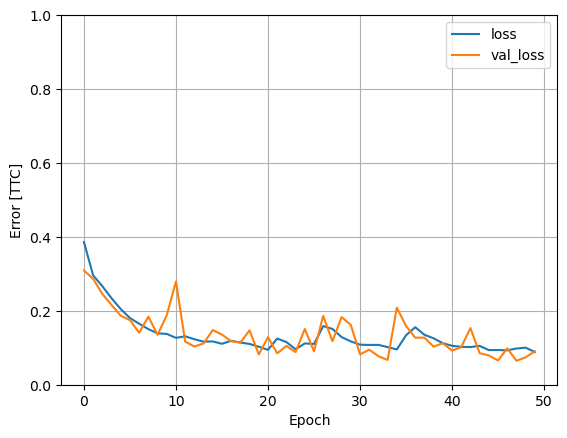

In [210]:
plot_loss(history)

534/534 [==============================] - 1s 2ms/step


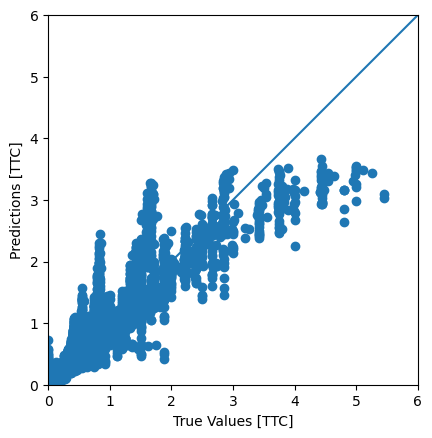

In [211]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [TTC]')
plt.ylabel('Predictions [TTC]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

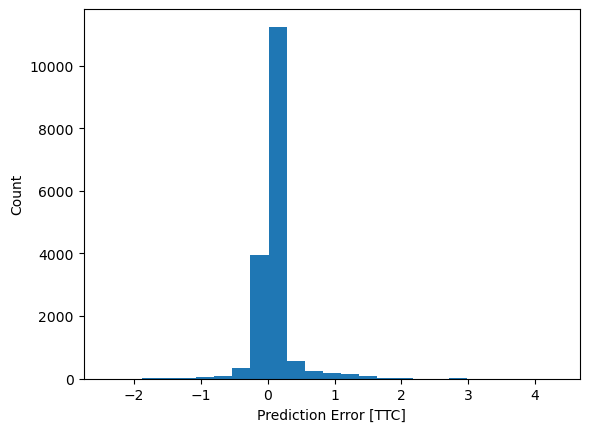

In [212]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [TTC]')
_ = plt.ylabel('Count')

In [213]:
print(test_labels[:10])
prediction = dnn_model.predict(test_features[:10])
print(prediction)

2     0.375000
10    0.333333
13    0.416667
20    0.313433
21    0.313433
27    0.284483
30    0.416667
43    0.375000
46    0.276786
55    0.375000
Name: TTC, dtype: float64
1/1 [==============================] - 0s 20ms/step
[[0.43719643]
 [0.5086366 ]
 [0.8842079 ]
 [0.41181526]
 [0.44447964]
 [0.41968286]
 [0.74240303]
 [0.36786592]
 [0.4042079 ]
 [0.56856   ]]


In [ ]:
# plt.figure(figsize=(10,8))
# plt.plot(test_labels[:10], color = 'green', label="original targets")
# plt.figure(figsize=(10,8))
# plt.plot(prediction, color = 'blue', label="predicted targets")
# plt.legend()
# plt.xlabel('examples')
# plt.ylabel('predictions')

In [ ]:
#Hyperparameter tuning###########################
##################################################

In [ ]:
# splitting into training and test set
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# #dataset["TTC"] = np.log1p(dataset["TTC"])
# Normalizer = tf.keras.layers.Normalization(axis=-1)
# Normalizer.adapt(np.array(cleaned))
# print(cleaned)
# labels = normalizedData.pop('TTC')
# train_dataset = normalizedData.sample(frac=0.8, random_state=0)
# test_dataset = normalizedData.drop(train_dataset.index)

# train_features = train_dataset.copy()
# test_features = test_dataset.copy()

# train_labels = train_features.pop('TTC')
# test_labels = test_features.pop('TTC')

# #Normalizing the feature values

# # testNormalizer = tf.keras.layers.Normalization(axis=-1)

# # testNormalizer.adapt(np.array(test_features))

# first = np.array(normalizedData[:1])

# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first)
#   print()
#   print('Normalized:', Normalizer(first).numpy())
# Normalizer

In [70]:
#Creating the Neural network model

# linear_model = tf.keras.Sequential([
#     trainNormalizer,
#     layers.Dense(units=1, activation = 'relu'),
#     layers.Dense(units=1, activation = 'relu')
# ])

In [102]:

# hidden_units1 = 160
# hidden_units2 = 480
# hidden_units3 = 256
# learning_rate = 0.01
# model = tf.keras.Sequential([
#     layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
#     layers.Dense(1, kernel_initializer='normal', activation='linear')
#   ])

In [ ]:
#################################################################################################################################################################################
#  Old code 
###############################################################################################################################################################################

In [155]:
hidden_units1 = 160
hidden_units2 = 480
model = tf.keras.Sequential([
    layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [156]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error',
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [160]:
history = model.fit(
    train_features,
    train_labels,
    epochs=20,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

history.history

print("Evaluate model on test data")
results = model.evaluate(test_features, test_labels, batch_size=128)
print("test loss, test acc:", results)


Epoch 1/20
319/319 [==============================] - 3s 8ms/step - loss: 1.1907 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.8959 - val_sparse_categorical_accuracy: 0.0357
Epoch 2/20
319/319 [==============================] - 2s 6ms/step - loss: 1.1463 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.5421 - val_sparse_categorical_accuracy: 0.0357
Epoch 3/20
319/319 [==============================] - 2s 6ms/step - loss: 0.8781 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.7975 - val_sparse_categorical_accuracy: 0.0357
Epoch 4/20
319/319 [==============================] - 2s 7ms/step - loss: 0.7694 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.0357
Epoch 5/20
319/319 [==============================] - 2s 7ms/step - loss: 0.7090 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.3575 - val_sparse_categorical_accuracy: 0.0357
Epoch 6/20
319/319 [==============================] - 2s 7ms/step - loss: 0.6152 - sparse_categorica

In [158]:
prediction = model.predict(test_features)
#prediction = model.predict(x_test[:1])
print("prediction shape:", prediction.shape)
prediction

58/58 [==============================] - 0s 1ms/step
prediction shape: (1827, 1)


array([[ 3.5121121],
       [ 3.7772603],
       [ 5.456351 ],
       ...,
       [-1.9884009],
       [-1.0284667],
       [-1.1376204]], dtype=float32)

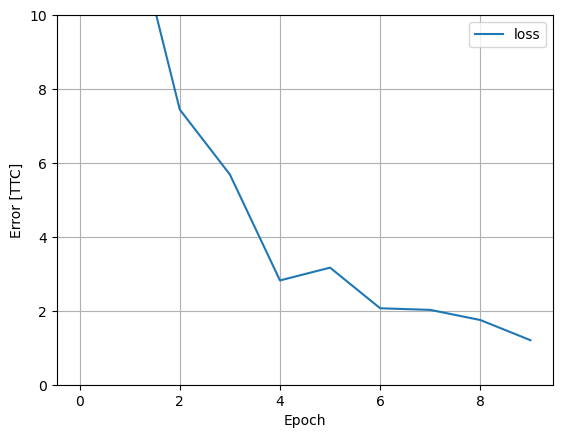

In [159]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TTC]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [ ]:
# #Visualising the Actual and predicted Result
# plt.plot(test_labels, color = 'green', label = 'Actual')
# plt.plot(prediction, color = 'blue', label = 'Predicted')
# plt.grid(alpha = 0.3)
# plt.xlabel('Number')
# plt.ylabel('TTC')
# plt.title('Actual vs Predicted')
# plt.legend()
# plt.show()

Text(0, 0.5, 'predictions')

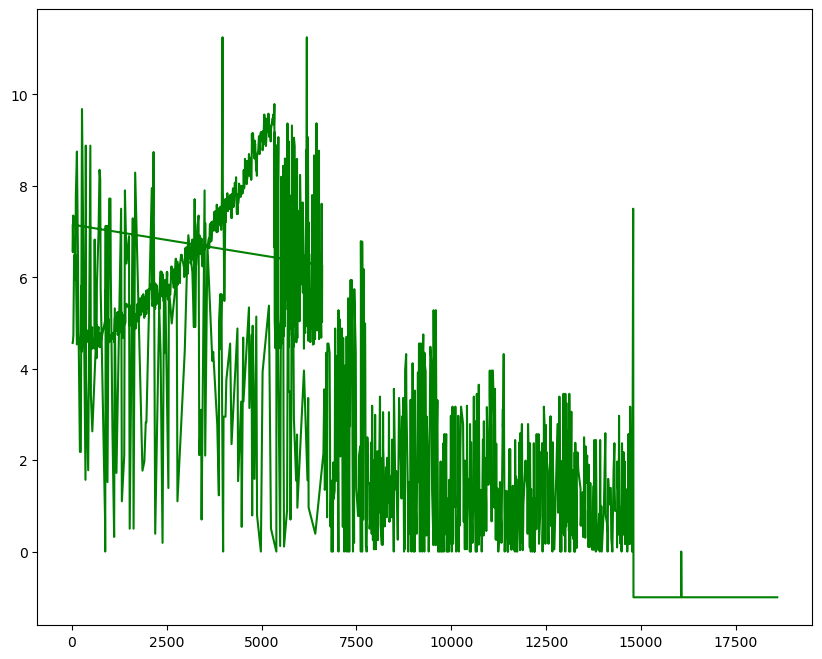

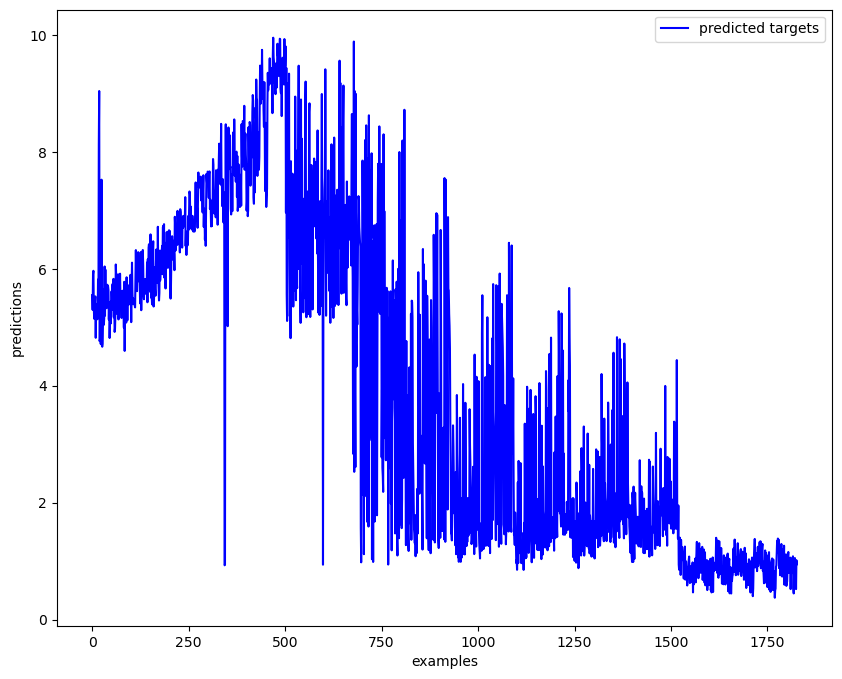

In [126]:
plt.figure(figsize=(10,8))
plt.plot(test_labels, color = 'green', label="original targets")
plt.figure(figsize=(10,8))
plt.plot(prediction, color = 'blue', label="predicted targets")
plt.legend()
plt.xlabel('examples')
plt.ylabel('predictions')
#denormalizeLayer = tf.keras.layers.Normalization(axis=-1, invert=True)
#denormalizeLayer.adapt(np.array(prediction))


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.python.keras import layers
from scipy import stats
import math

#importing the dataset
dataset1 = pd.read_csv('C:\\Users\\thiru\\Desktop\\ANN05_11_Dataset_With17k rows\\ANNDatasetPedV0.0-5.5_CarV2.0-20.0_pt0-3000_202211041224.csv')

#removing 1st 4 columns to use only normalized values
dataset1.drop(columns=dataset1.columns[0:4], axis=1,  inplace=True)
#dataset.drop(columns=dataset.columns[-1], axis=1,  inplace=True)

#Rounding position values to 2 decimal places
dataset1['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset1['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset1['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset1['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset1['TTC'] = np.around(dataset1['TTC'].astype(float), decimals= 2)
dataset1.drop(dataset1.loc[dataset1['TTC']>10].index, inplace=True)
#dataset1.drop(dataset1.loc[dataset1['TTC'].equals(math.isinf())].index, inplace=True)
dataset1.drop(dataset1.loc[dataset1['TTC']<0].index, inplace=True)
dataset1.replace([np.inf, -np.inf], -1, inplace=True)
#Removing duplicates from the dataset
dataset1.drop_duplicates(inplace=True)
dataset1

dataset2 = pd.read_csv('C:\\Users\\thiru\\Desktop\\FinalDatasetsForNeuralNetwork\\ANNDatasetPedXMax25.0-5.5_PedYMax25.0-20.0_Pedvstep0.1-Carvstep0.2_dttime271120221819.csv')
dataset2.drop(columns=dataset2.columns[0:4], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[2], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[3], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[3], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[4], axis=1,  inplace=True)
#dataset2.drop(columns=dataset2.columns[2,4,5,7], axis=1,  inplace=True)
#dataset2.drop(columns=dataset2.columns[2,4,5,7], axis=1,  inplace=True)

dataset2['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset2['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset2['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset2['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset2.replace([np.inf, -np.inf], -1, inplace=True)
dataset2['TTC'] = np.around(dataset2['TTC'].astype(float), decimals= 2)
concatenatedData = pd.concat([dataset1, dataset2],ignore_index= True)
concatenatedData.drop_duplicates(inplace=True)
concatenatedData